<a href="https://colab.research.google.com/github/BC-Chang/ms-net-workshop/blob/main/Introduction_to_Machine_Learning_Concepts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Machine Learning Concepts

### We hear about the magic of machine learning... but what is it exactly? How does it work?

### In this first Colab notebook, we will go over some fundamental machine learning concepts.

In [1]:
#@title Import some helpful packages

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon
import seaborn as sns
from IPython.display import clear_output
import ipywidgets as widgets
from IPython.display import display
from scipy.signal import convolve2d
import cv2

from tqdm import tqdm

## Some fun examples of machine learning in action:


*   [This Person Does Not Exist](https://this-person-does-not-exist.com/)
*   [AI model that can draw images from any text prompt](https://www.craiyon.com/)



## Deep Learning

Deep Learning is a subfield of machine learning concerned with algorithms inspired by the structure and function of the brain called artificial neural networks.


### The Goal:
$ Y = f(X_1, ..., X_m) + ϵ $

Estimate the model $f$ for:
> **Inference:** Given a sample, describe the population

> **Prediction:** Given an assumption about the population, predict the outcome of the next sample

### Bias-Variance Tradeoff

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Bias_and_variance_contributing_to_total_error.svg/1280px-Bias_and_variance_contributing_to_total_error.svg.png" width="400">

> **Bias:** Low model complexity leads to high bias — model does not pay attention to training data and oversimplifies the model

> **Variance:** Complex models lead to high variance — model pays too much attention to the training data and does not generalize well to new data.

We need to find a balance between bias and variance that minimizes the total error!


### Building a Machine Learning Model:
1. Data Acquisition and Preprocessing
2. Split the Data into Train and Test Subsets
3. Build and Train a Model
4. Evaluate Model Performance
5. Hyperparameter Tuning



## Building a Neural Network from the Ground Up:

Neural Networks are built from individual units called ***Neurons*** (also called Nodes or Perceptrons).

Neurons perform mathematical operations by first taking in a linear combination of weighted inputs:
$y = wx + b$

The weight ($w$) and bias ($b$) terms are the ***trainable parameters***.

Neurons introduce non-linearity by passing the weighted inputs through an ***Activation Function ($\sigma$)***

Some examples of common activation functions:
 * ReLU($y$) = max($0$, $y$)
 * Tanh($y$) = $\frac{e^y - e^{-y}}{e^y + e^{-y}}$
 * sigmoid($y$) = $1 / (1 + $exp$(-y))$



In the end, a neuron will output:

$y = \sigma(\Sigma(w_dx_d + b)$)



IntRangeSlider(value=(-5, 2), description='Input range:', max=5, min=-5)

FloatSlider(value=-0.5, description='Weight value:', max=2.0, min=-2.0)

FloatSlider(value=-0.6, description='Bias value:', max=2.0, min=-2.0)

RadioButtons(description='Activation:', index=1, options=('Linear', 'Sigmoid', 'Tanh', 'ReLU'), value='Sigmoid…

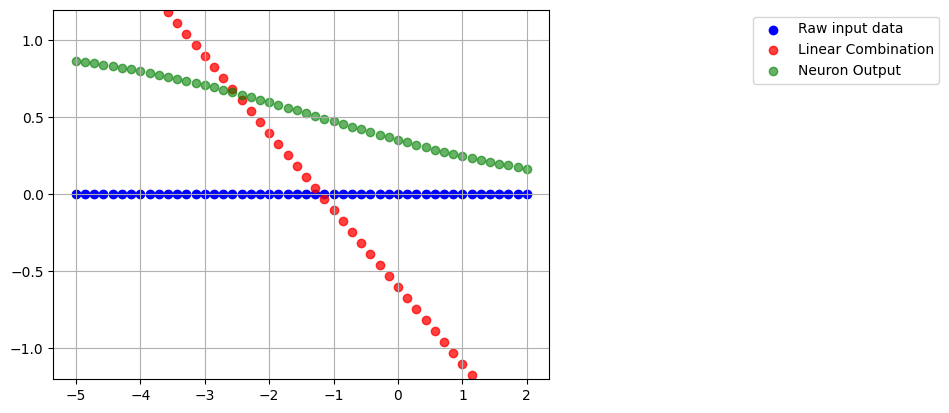

In [2]:
# @title A single neuron

xi = widgets.IntRangeSlider()
xi.min = -5
xi.max =  5
xi.value= [-2, 2]
xi.description='Input range:'
display(xi)


w = widgets.FloatSlider()
w.value= 0
w.min = -2
w.max =  2
w.description='Weight value:'
display(w)

b = widgets.FloatSlider()
b.value= 0
b.min = -2
b.max =  2
b.description='Bias value:'
display(b)

act = widgets.RadioButtons()
act.options=['Linear','Sigmoid', 'Tanh', 'ReLU']
act.value = 'Linear'
act.description = 'Activation:'
display(act)

def plot_w(*args):
#def plot_w(xi=xi,w=w,b=b,act=act):
    x_t = np.linspace(xi.value[0],xi.value[1])
    y_t = x_t*w.value+b.value
    y_i = y_t.copy()
    if act.value=='Sigmoid':
        y_i = 1 / (1 + np.exp(-y_i))
    if act.value=='ReLU':
        y_i = np.maximum(y_i,0)
    if act.value == 'Tanh':
        y_i = (np.exp(y_i) - np.exp(-y_i)) / (np.exp(y_i) + np.exp(-y_i))

    #plt.figure(1)
    #plt.close()
    clear_output(wait=True)
    display(xi,w,b, act)
    plt.scatter(x_t, np.zeros_like(x_t), c='b')
    plt.scatter(x_t, y_t, c='r', alpha=0.75)
    plt.scatter(x_t, y_i, c='g', alpha=0.6)
    plt.grid()
    plt.legend(['Raw input data',
                'Linear Combination',
                'Neuron Output'], bbox_to_anchor =(1.8, 1))
    plt.ylim([-1.2, 1.2])
    plt.show()

plot_w()

xi.observe(plot_w,'value')
w.observe(plot_w,'value')
b.observe(plot_w,'value')
act.observe(plot_w,'value')


### How does a neuron learn?

You can think of machine learning as an optimization problem.

The values of a neuron's trainable parameters ($w$ and $b$) are adjusted based on the training data. These parameters are continuously tweaked to minimize a ***loss function***:

$ Loss = f_{loss}(\hat{y}, y)$

Common loss functions include mean squared error and mean absolute error.



### Putting Neurons Together

In neural networks, we organize neurons into ***Layers***. There are 3 basic classifications of layers:

<img src='https://miro.medium.com/v2/resize:fit:1100/1*YgJ6SYO7byjfCmt5uV0PmA.png' width="350">

***Deep Neural Network*** are ones that contain multiple hidden layers

<img src='https://i.stack.imgur.com/xODHX.png' width="350">


Let's play around on [Tensorflow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.61310&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&learningRate_hide=true&regularizationRate_hide=true&percTrainData_hide=true&batchSize_hide=true&regularization_hide=true)

<img src='https://i.ytimg.com/vi/JfTHKNDccCg/maxresdefault.jpg' width="350">

### How do networks learn? With Gradient Descent!

Recall that the goal of training is to minimize a loss function. We do this via ***gradient descent***.

<img src='https://miro.medium.com/max/700/1*OG1d4edy5BFYeQ0yHjBOJA.gif' width="500" height="400">

Gradient descent works by iteratively taking steps in the direction of the negative gradient of the loss function. This gradient gets added to each trainable parameter after each iteration.

<img src='https://miro.medium.com/max/956/1*hUd744hDEEGx0-ypWGhrkw.gif' width="400">

Mathematically, what we are doing to update the weights and biases is:

$w_i = w_i - \alpha \frac{∂MSE}{∂w_i} (w_i) $

### Backpropagation: How Gradients Are Calculated

Backpropagating the loss into the neural net calculates the gradient of the error function with respect to the neural network's weights.

We apply the chain rule to the loss function because each neuron output is related to the trainable parameters of the previous layer!


**Chain rule example**:

Say we have functions,

> $z = y^2$ and $y = 3x - 2$


We want to find $\frac{dz}{dx}$. Recall the chain rule:

> $\frac{dz}{dx} = \frac{dz}{dy}\frac{dy}{dx}$


Our derivatives for each layer:
> $\frac{dz}{dy} = 2y$ and $\frac{dy}{dx} = 3$

If our "weight" (x) = 2,
> $y(2) = 4$

> $z(4) = 16$

Evaluating our derivatives at x = 2:
> $\frac{dy}{dx} = 3$

>$\frac{dz}{dy} = 8$

>$\rightarrow \frac{dz}{dx}(x=2) = 24$

**Simple Neural Network Example**

Worked example from [Alexander Schiendorfer](https://alexander-schiendorfer.github.io/2020/02/24/a-worked-example-of-backprop.html)

<img src='https://github.com/Alexander-Schiendorfer/Alexander-Schiendorfer.github.io/blob/master/notebooks/netinstance1_in.png?raw=1' width="500" height="300">







.

In [3]:
# Let's assume we are using the sigmoid activation function
def sigmoid(z):
    return 1./(1. + np.exp(-z))

# Input values
x1, x2 = 3., 1.

# Layer 1 weights
w11 = 6
w21 = -2
w12 = -3
w22 = 5

# Linear combination for first layer
h1_in = w11*x1 + w21*x2
h2_in = w12*x1 + w22*x2
print(f"h1_in = {h1_in}, h2_in = {h2_in}")

# Apply activation function
h1_out = sigmoid(h1_in)
h2_out = sigmoid(h2_in)
print(f"h1_out = {h1_out}, h2_out = {h2_out}")


# Same thing for the output layer
v11 = 1
v21 = 0.25
v12 = -2
v22 = 2
y1_in = v11*h1_out + v21*h2_out
y2_in = v12*h1_out + v22*h2_out

print(f"y1_in = {y1_in}, y2_in = {y2_in}")

y1_out = sigmoid(y1_in)
y2_out = sigmoid(y2_in)

print(f"y1_out = {y1_out}, y2_out = {y2_out}")


h1_in = 16.0, h2_in = -4.0
h1_out = 0.9999998874648379, h2_out = 0.01798620996209156
y1_in = 1.0044964399553609, y2_in = -1.9640273550054927
y1_out = 0.7319417133694889, y2_out = 0.12303185591001443


Here is what our network looks like with the randomly initialized weights:

<img src="https://github.com/Alexander-Schiendorfer/Alexander-Schiendorfer.github.io/blob/master/notebooks/netinstance1.png?raw=1" width="500" height="250">

The target (labeled) data tells us that the network should have produced (y1 = 1, y2 = 0). Instead, it gave us (0.73, 0.12).

For simplicity in computing the gradients, let's assume that our chosen loss function is the sum of squares: $L = \sum(y_i - t_i)^2 = \sum e_i^2$

It's also convenient to know that the sigmoid function has a nice derivative: $\frac{\partial \sigma}{\partial z} = \sigma(z) (1-\sigma(z))$.

This way, we can apply the chain rule to backpropagate through the sigmoid activation function and compute the gradients of the inputs into the last layer.



In [12]:
# Calculate the residual for each output node
t1, t2 = 1., 0.
e1, e2 = (y1_out - t1), (y2_out - t2)

# Derivative of the loss function (MSE) with respect to output nodes
grad_y1_out = 2*e1
grad_y2_out = 2*e2

# Get value before the activation function
grad_y1_in = (y1_out * (1-y1_out)) * grad_y1_out
grad_y2_in = (y2_out * (1-y2_out)) * grad_y2_out

# Figure out the gradient by which to update weights between hidden and output layers
grad_v21 = grad_y1_in * h2_out
grad_v22 = grad_y2_in * h2_out
grad_v11 = grad_y1_in * h1_out
grad_v12 = grad_y2_in * h1_out


print(f'{grad_y1_out = :.2f}')
print(f'{grad_y2_out = :.2f}')
print('-'*50)
print(f'{grad_y1_in = :.2f}')
print(f'{grad_y2_in = :.3f}')
print('-'*50)
print(f'{grad_v11 = :.2f}')
print(f'{grad_v12 = :.3f}')
print(f'{grad_v21 = :.3f}')
print(f'{grad_v22 = :.4f}')


grad_y1_out = -0.54
grad_y2_out = 0.25
--------------------------------------------------
grad_y1_in = -0.11
grad_y2_in = 0.027
--------------------------------------------------
grad_v11 = -0.11
grad_v12 = 0.027
grad_v21 = -0.002
grad_v22 = 0.0005


Great! We calculated four of eight gradients! Now how do we get the next set of four?

In [10]:
# Gradient of the hidden node outputs
grad_h1_out = grad_y1_in*v11 + grad_y2_in*v12
grad_h2_out = grad_y1_in*v21 + grad_y2_in*v22

# Backpropagate through sigmoid
grad_h1_in = (h1_out * (1-h1_out)) * grad_h1_out
grad_h2_in = (h2_out * (1-h2_out)) * grad_h2_out

# get the gradients for the weights
grad_w21 = grad_h1_in * x2
grad_w22 = grad_h2_in * x2
grad_w11 = grad_h1_in * x1
grad_w12 = grad_h2_in * x1


print(f'{grad_h1_out = :.3f}')
print(f'{grad_h2_out = :.3f}')
print('-'*50)
print(f'{grad_h1_in = :.3f}')
print(f'{grad_h2_in = :.4f}')
print('-'*50)
print(f'grad_w21 = {grad_w21}')
print(f'grad_w22 = {grad_w22}')
print(f'grad_w11 = {grad_w11}')
print(f'grad_w12 = {grad_w12}')


grad_h1_out = -0.158
grad_h2_out = 0.027
--------------------------------------------------
grad_h1_in = -0.000
grad_h2_in = 0.0005
--------------------------------------------------
grad_w21 = -1.7812716122177433e-08
grad_w22 = 0.0004733812240027136
grad_w11 = -5.34381483665323e-08
grad_w12 = 0.0014201436720081408


Giving us the final gradient picture for the first training instance:

<img src="https://alexander-schiendorfer.github.io/images/backprop/inst1-complete.png" width="500" height="270">

### What about that $\alpha$?

Recall that weights are updated according to:

> $w_i = w_i - \alpha \frac{∂MSE}{∂w_i} (w_i) $

The $\alpha$ is known as the **learning rate** and determines the step size the trainable parameters take in the gradient direction.

Larger learning rates = larger step sizes (usually faster learning)... but be careful!

<img src="https://sci-arch.com/figures/learning_rates.png" width="634" height="307">

Using this formula, we can prescribe a learning rate and update our weights accordingly.

In [33]:
# Apply gradient updates
alpha = 0.5  # Typically, alpha is much smaller, but we will make learning rate large for demonstration

# New Layer 1 weights
w11_new = w11 - alpha * grad_w11
w21_new = w21 - alpha * grad_w21
w12_new = w12 - alpha * grad_w12
w22_new = w22 - alpha * grad_w22

# New Layer 2 weights
v11_new = v11 - alpha * grad_v11
v21_new = v21 - alpha * grad_v21
v12_new = v12 - alpha * grad_v12
v22_new = v22 - alpha * grad_v22


print("Layer 1 Weights")
print("Old Weights: \t New Weights")
print(f"{w11} \t\t {w11_new}")
print(f"{w12} \t\t {w12_new}")
print(f"{w21} \t\t {w21_new}")
print(f"{w22} \t\t {w22_new}")
print("-"*50)
print("Layer 2 Weights")
print("Old Weights: \t New Weights")
print(f"{v11} \t\t {v11_new}")
print(f"{v12} \t\t {v12_new}")
print(f"{v21} \t\t {v21_new}")
print(f"{v22} \t\t {v22_new}")

Layer 1 Weights
Old Weights: 	 New Weights
6 		 6.000000026719074
-3 		 -3.000710071836004
-2 		 -1.999999991093642
5 		 4.9997633093879985
--------------------------------------------------
Layer 2 Weights
Old Weights: 	 New Weights
1 		 1.052593845244126
-2 		 -2.013274522856131
0.25 		 0.2509459640497288
2 		 1.9997612416178943


We can do forward propagation again with the new set of weights and evaluate the loss to see if we've improved the model at all.

In [39]:
# Linear combination for first layer
h1_in = w11_new*x1 + w21_new*x2
h2_in = w12_new*x1 + w22_new*x2

# Apply activation function
h1_out = sigmoid(h1_in)
h2_out = sigmoid(h2_in)

# Same thing for the output layer
y1_in = v11_new*h1_out + v21_new*h2_out
y2_in = v12_new*h1_out + v22_new*h2_out

# Apply activation function to output layer
y1_out_new = sigmoid(y1_in)
y2_out_new = sigmoid(y2_in)

# Compute the new loss values
e1_new, e2_new = (y1_out_new - t1), (y2_out_new - t2)


print("Previous Prediction: ")
print(f"{y1_out = :.4f}, {y2_out = :.4f}")
print("-" * 50)
print("Current Prediction: ")
print(f"{y1_out_new = :.4f}, {y2_out_new = :.4f}")
print("-" * 50)
print("Previous Loss: \t Current Loss:")
print(f"{e1**2 + e2**2: .4f} \t {e1_new**2 + e2_new**2: .4f}")


Previous Prediction: 
y1_out = 0.7319, y2_out = 0.1230
--------------------------------------------------
Current Prediction: 
y1_out_new = 0.7421, y2_out_new = 0.1216
--------------------------------------------------
Previous Loss: 	 Current Loss:
 0.0870 	  0.0813


This was a tedious exercise, and note that we did this for only one training sample. Thankfully, we can express all of these steps using linear algebra and matrix operations. Certain libraries such as TensorFlow and PyTorch optimize these operations and make implementation much easier!

### "Problems" with Gradient Descent
1. Local Minima

<img src='https://miro.medium.com/max/1400/1*47skUygd3tWf3yB9A10QHg.gif' width="400">





2. Saddle Points

<img src='https://i.stack.imgur.com/gjDzm.gif' width="400">




**Stochastic Gradient Descent (SGD)**

* Randomly pick one sample to update weights instead of using every training sample

**Optimizers**

* Algorithms implemented to dynamically adjust hyperparameters (variables used to control the learning process, **not to be confused with parameters**)


### Iterative Training:

* **Batch:** A subset of training data used in one gradient update.
  * Helps reduce memory requirement and improve training speed
* **Epoch:** The number of times that the network has gone through the entire dataset





### We use loss plots to diagnose our model training:

A good loss curve will show good agreement between training and validation loss:

<img src="https://machinelearningmastery.com/wp-content/uploads/2018/12/Example-of-Train-and-Validation-Learning-Curves-Showing-A-Good-Fit.png" width="400" height="300">


*Underfit Model*: Model cannot learn the training set
* Has large training loss values

<img src="https://machinelearningmastery.com/wp-content/uploads/2019/02/Example-of-Training-Learning-Curve-Showing-An-Underfit-Model-That-Does-Not-Have-Sufficient-Capacity.png" width="400" height="300">

* Training loss continues to decrease at the end of the plot

<img src="https://machinelearningmastery.com/wp-content/uploads/2018/12/Example-of-Training-Learning-Curve-Showing-An-Underfit-Model-That-Requires-Further-Training.png" width="400" height="300">

*Overfit Model*: Model learns the statistical noise of the training set (does not generalize well)

* Training loss continues to decrease
* Validation loss decreases then begins increasing again

<img src="https://machinelearningmastery.com/wp-content/uploads/2018/12/Example-of-Train-and-Validation-Learning-Curves-Showing-An-Overfit-Model.png" width="400" height="300">




*Unrepresentative Training Set*: Training set does not provide sufficient information to learn the problem

* Both curves show improvement, but a large gap exists between the two curves

<img src="https://machinelearningmastery.com/wp-content/uploads/2018/12/Example-of-Train-and-Validation-Learning-Curves-Showing-a-Training-Dataset-the-May-be-too-Small-Relative-to-the-Validation-Dataset.png" width="400" height="300">


*Unrepresentative Validation Set*: Validation set does not provide sufficient information to evaluate the model's ability to generalize

* Training loss looks good, but validation loss is noisy

<img src="https://machinelearningmastery.com/wp-content/uploads/2018/12/Example-of-Train-and-Validation-Learning-Curves-Showing-a-Validation-Dataset-the-May-be-too-Small-Relative-to-the-Training-Dataset.png" width="400" height="300">

* Validation loss may be lower than training loss

<img src="https://machinelearningmastery.com/wp-content/uploads/2018/12/Example-of-Train-and-Validation-Learning-Curves-Showing-a-Validation-Dataset-that-is-Easier-to-Predict-than-the-Training-Dataset.png" width="400" height="300">





## Putting it all together (manually)

### Here we will try to fit a polynomial expansion of a cosine wave.

Text(0.5, 1.0, 'Target')

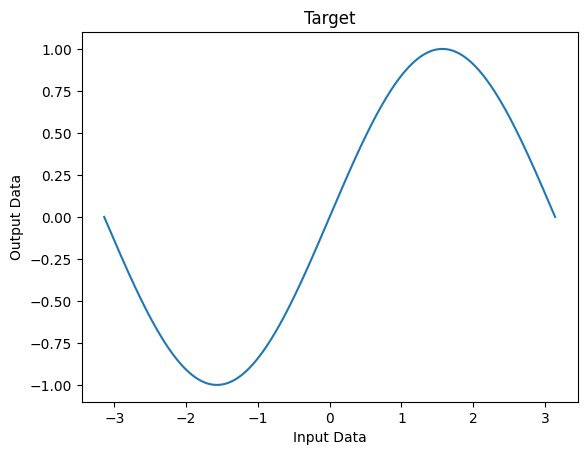

In [17]:
#@title First, we need to create some "training" data

x = np.linspace(-np.pi, np.pi, 2000)
y = np.sin(x)

plt.figure()
plt.plot(x, y)
plt.xlabel('Input Data')
plt.ylabel('Output Data')
plt.title('Target')

## At it's core, machine learning is curve fitting!
## The curve we want to fit here is the cosine wave, but machines do not know about trigonometric functions.
## Instead, they will try to fit the weights of a polynomial function.
## Let's say we know the form of our polynomial function (parameterized):

$\text{cos}(x) = ∑_{n=0}^∞ \frac{(-1)^n}{(2n+1)!} x^{2n+1} \approx 0 + x + 0x^2 - \frac{1}{6} x^3 + ...$

100%|██████████| 30000/30000 [00:07<00:00, 3907.38it/s]


Text(0.5, 0, 'Epoch')

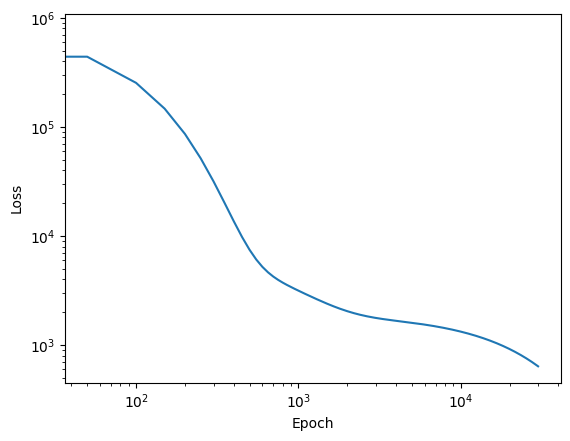

In [24]:
# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

# Our learning rate
learning_rate = 1e-8

# Number of epochs
n_epochs = 30000

# Some empty lists to store epoch and loss history
epoch = []
loss = []

# Training loop
for t in tqdm(range(n_epochs)):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    epoch_loss = np.square(y_pred - y).sum()
    if t % 50 == 0:
      epoch.append(t)
      loss.append(epoch_loss)
      # print(f'Epoch: {t}, Loss: {epoch_loss}')

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


plt.figure()
plt.loglog(epoch, loss)
plt.ylabel('Loss')
plt.xlabel('Epoch')


Result: y = -0.674 + 0.395 x + 0.116 x^2 + -0.028 x^3


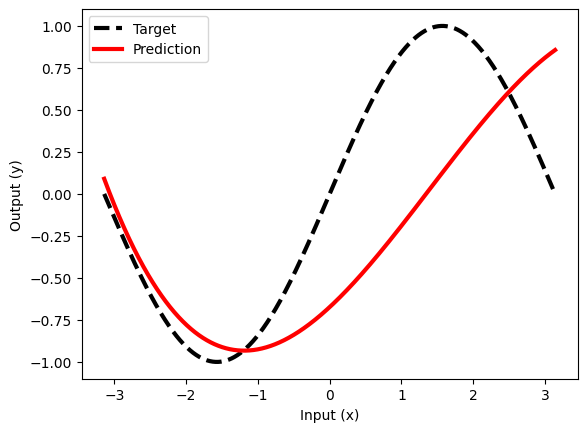

In [25]:
#@title Print and plot our model prediction

print(f'Result: y = {a:.3f} + {b:.3f} x + {c:.3f} x^2 + {d:.3f} x^3')

plt.plot(x, y, 'k--', linewidth=3, label='Target')
plt.plot(x, y_pred, 'r-', linewidth=3, label='Prediction')
plt.xlabel('Input (x)')
plt.ylabel('Output (y)')
plt.legend()

## Convolutional Neural Networks

Convolutional neural networks (CNNs) are great when our data contains spatial information (e.g. digital rocks applications!)

A neural network consisting of convolutional and pooling layers followed by a fully connected network

<img src="https://miro.medium.com/v2/resize:fit:1467/0*I0Z5y7Ccn49WWZfa.jpeg" width="500" height="300">


### **Convolutional Layer**

Made up of a set of independent filters. Each filter is convolved with the image to create feature maps that learn different aspects of the image.

These filters are often initialized with random values and the network trains to find the ideal values.

<img src="https://miro.medium.com/v2/resize:fit:1070/1*Zx-ZMLKab7VOCQTxdZ1OAw.gif" width="500" height="300">



### **Pooling**

Reduce the matrix created by the convolutional layer to a smaller matrix

Decreases the computational power and reduces noise while extracting dominant features.

<img src="https://lh3.googleusercontent.com/-Umx41Ralcms/WYnmrMbXMUI/AAAAAAAAR14/xwHiCXTQFosieaSkjlVuoSxZ7ac_pIqxQCLcBGAs/s0/pool.JPG" width="350" height="300">

## Try out the feature maps!

(-0.5, 899.5, 854.5, -0.5)

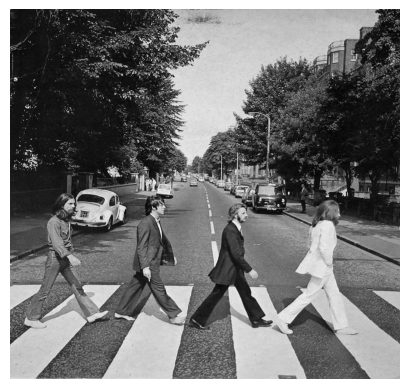

In [26]:
# download an image
#!wget --quiet https://upload.wikimedia.org/wikipedia/commons/3/3e/Testbuilding.jpg -O WikiTestBuilding.jpg
!wget --quiet https://github.com/BC-Chang/ms-net-workshop/raw/main/images/abbey_road.tif -O abbey_road.tif
# Read in the image
im = cv2.imread('abbey_road.tif')

# Take only the first color channel
im = im[:, :, 0]

# Plot the image
plt.imshow(im, cmap='gray')
plt.axis('off')

### Let's play around with convolutions!

Try changing the values in the kernel to extract different features.

Some suggestions:

$$ \text{Horizontal Lines} = \begin{bmatrix} -1 & -1 & -1 \\ 2 & 2 & 2 \\ -1 & -1 & -1 \end{bmatrix} $$

$$ \text{Vertical Lines} = \begin{bmatrix} -1 & 2 & -1 \\ -1 & 2 & -1 \\ -1 & 2 & -1 \end{bmatrix} $$


The kernel values are a large part of what gets trained in a classical CNN. While it's possible to visualize the feature maps generated by a CNN model, they typically mean very little in terms of physical interpretation.

(-0.5, 899.5, 854.5, -0.5)

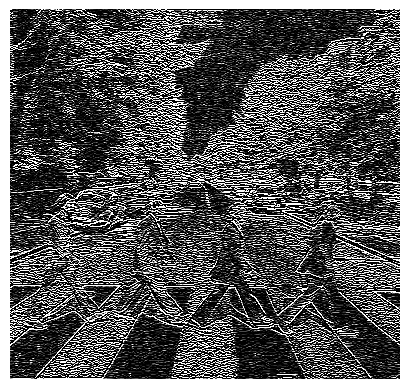

In [28]:
kernel = np.array([[ -1, -1, -1],
                   [  2,  2,  2],
                   [ -1, -1, -1],])

# kernel = np.array([[ -1, 2, -1],
#                    [ -1, 2, -1],
#                    [ -1, 2, -1],])



convolved_im = convolve2d(im, kernel, mode='same', boundary='symm')


plt.imshow(convolved_im, cmap='gray', vmin=0, vmax=10)
plt.axis('off')
